# **TP n°2 du module traitement d'image**
# **BOUTEBAL Sihem**
# **2DSIA**

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# 1. Lire et afficher l'image ‘flower.bmp’:

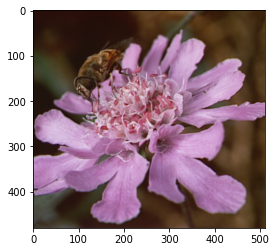

In [ ]:
image = plt.imread('/content/flower.bmp')
plt.imshow(image)

# 2. Convertir l’image en niveaux de gris :

In [ ]:
#On va d'abord separer les composantes R G B :
R,G,B=cv.split(image)


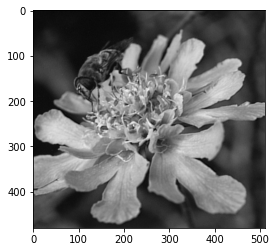

In [ ]:
#Convertir l'image a l'aide de la formule:
image_gris= 0.2126*R+0.7152*G+0.0722*B
plt.imshow(image_gris, plt.cm.gray)  # afficher l'image

# 3. Calculer et afficher l’histogramme et l’histogramme normalisé:

In [ ]:
#on va d'abord cree un tableu unidimentionnel qui contient tous les niveaux de gris (on va applatir la matrice des niveaux de gris(l'image))
histogramme = image_gris.ravel()



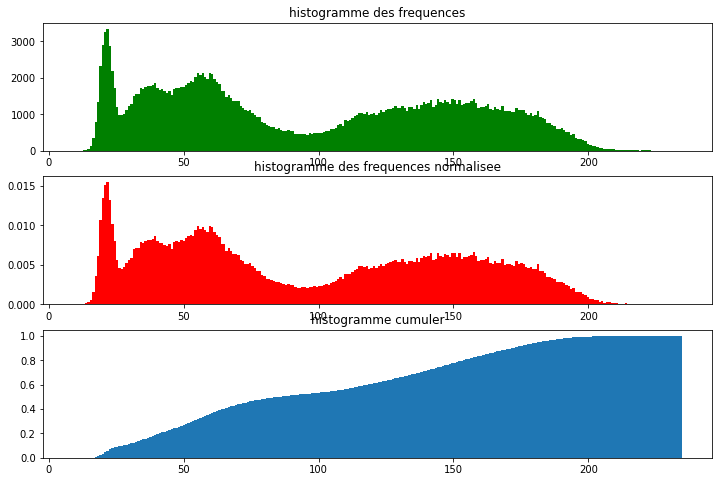

In [ ]:
# Affichage de l'histogramme :
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.hist(histogramme,bins=256,color='g')
plt.title('histogramme des frequences')
# Affichage de l'histogramme normalisé:
plt.subplot(3,1,2)
plt.hist(histogramme,bins=256,density='True',color='r')
plt.title('histogramme des frequences normalisee')
# Affichage de l'histogramme cumulé :
plt.subplot(3,1,3)
plt.hist(histogramme,density=True, cumulative=True,bins=256)
plt.title('histogramme cumuler')


plt.show()

# Commentaires:
On remarque que les niveaux de gris sont concentrés au milieu, l'image est gritastre et manque de contraste.

# 5. Réaliser une égalisation d’histogramme :

In [ ]:
#calculer l'histogramme des effectives
# On va crée une fonction qui va faire l'égalisation d'istogramme et retourne l'histogramme normalisé comme resultat:
def egaliser(histogramme):
  #histogramme des eff:
  histo= np.zeros(256) 
  for i in histogramme:
    histo[int(i)]=histo[int(i)]+1
  #calculer l'histogramme cumunlee
  histo_cumulee=np.zeros(histo.size)
  histo_cumulee[0]=0
  for i in range(1,256):
    histo_cumulee[i]=histo[i]+histo_cumulee[i-1]
  #calculer l'histo egalise
  hcn=np.round((histo_cumulee/histogramme.size)*255)
  return hcn

  
  

  




    


Calcule de l'istogramme normalisé de l'image "image_gris":

In [ ]:

hcn=egaliser(histogramme)





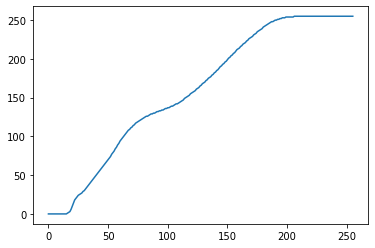

In [ ]:
# affichage de l'histogramme égalisé :
plt.plot(hcn)

# Commentaires:


Egaliser l'image:

Text(0.5, 1.0, 'image égalisé')

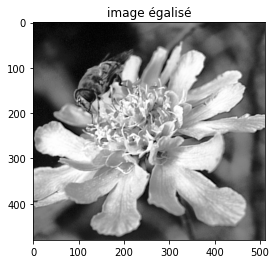

In [ ]:
image_gris_egalisee=image_gris
for i in range(0,image_gris.shape[0]):       
    for j in range(0,image_gris.shape[1]):   
        image_gris_egalisee[i,j] = hcn[int(image_gris[i,j])]
plt.imshow( image_gris_egalisee, plt.cm.gray)
plt.title("image égalisé")

# Commentaires:
On voit bien que l'image égalisé est mieux contrastée que l'image gris originale.


# Image egalisée avec la fonction cv.equalizeHist():

Text(0.5, 1.0, 'image égalisé')

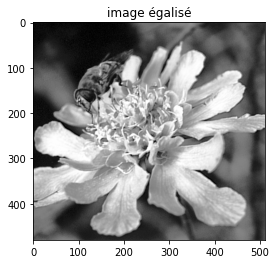

In [ ]:

image_egalisee=cv.equalizeHist(np.uint8(image_gris))
plt.imshow(image_egalisee,cmap='gray')
plt.title("image égalisé")


# Comparaison:
Les deux resultats sont trés proches, les deux images obtenues a partir de l'égalisation sont tous les deux bien contrastés.

# 7. Egaliser les 3 composantes couleurs indépendamment, puis visualiser l’image résultante:


In [ ]:
new_R=cv.equalizeHist(np.uint8(R))


In [ ]:
new_G=cv.equalizeHist(np.uint8(G))


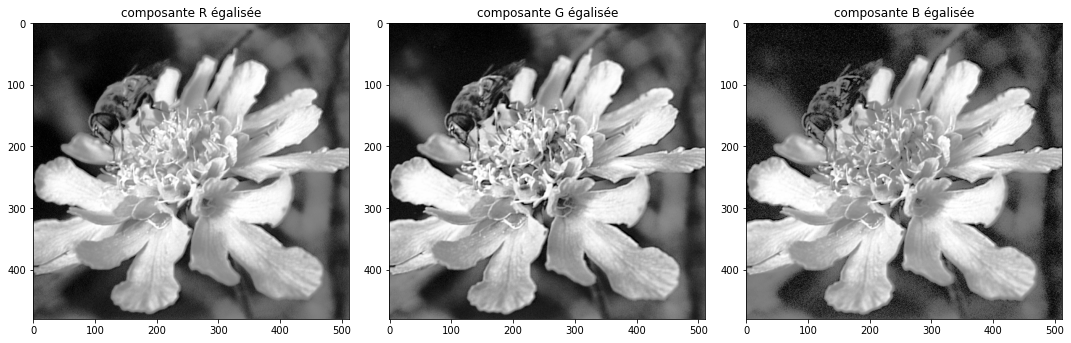

In [ ]:
new_B=cv.equalizeHist(np.uint8(B))
# affichage des 3 composnates R G B :
plt.figure(figsize=(15,17))
plt.subplot(1,3,1)
plt.imshow(new_R,cmap='gray')
plt.title("composante R égalisée")
plt.subplot(1,3,2)
plt.imshow(new_G,cmap='gray')
plt.title("composante G égalisée")
plt.subplot(1,3,3)
plt.imshow(new_B,cmap='gray')
plt.title("composante B égalisée")
plt.tight_layout()

Text(0.5, 1.0, 'Image résultante')

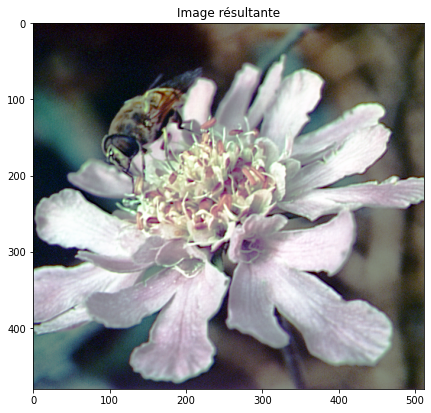

In [ ]:
#Limage resultante:
new_image=cv.merge([new_R,new_G,new_B])
plt.figure(figsize=(7,7))
plt.imshow(new_image)
plt.title("Image résultante")

# Calcule d'entropie:

In [ ]:
import skimage.measure as skm
entropie = skm.shannon_entropy(new_image)
print('l\'entropie est : ', entropie)

l'entropie est :  7.765114052922554


# Egaliser les 3 composantes couleurs par rapport à l’histogramme cumulé de la question 4 et visualiser l’image correspondante:

In [ ]:
#Egalisation de la composante R:
new_r=np.zeros(R.shape)
for i in range(0,R.shape[0]):       
    for j in range(0,R.shape[1]):   
        new_r[i,j] = hcn[int(R[i,j])]


In [ ]:
#Egalisation de la composante G:
new_g=np.zeros(G.shape)
for i in range(0,G.shape[0]):       
    for j in range(0,G.shape[1]):   
        new_g[i,j] = hcn[int(G[i,j])]

In [ ]:
#Egalisation de la composante B:
new_b=np.zeros(B.shape)
for i in range(0,B.shape[0]):       
    for j in range(0,B.shape[1]):   
        new_b[i,j] = hcn[int(B[i,j])]

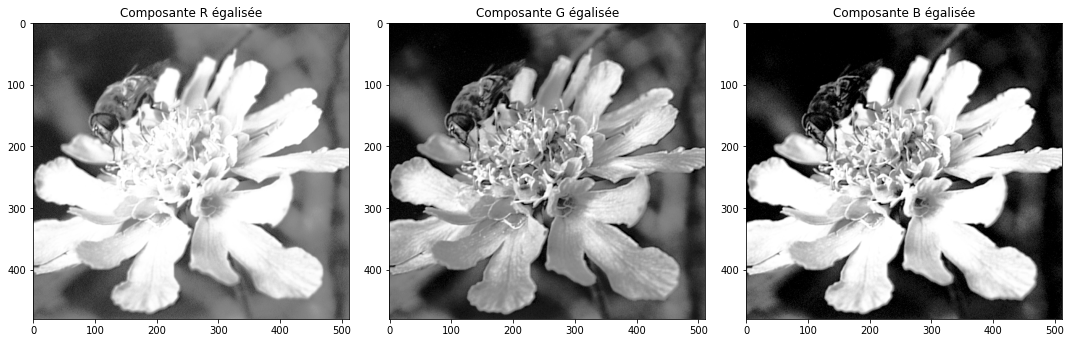

In [ ]:
plt.figure(figsize=(15,17))
plt.subplot(1,3,1)
plt.imshow( new_r, plt.cm.gray)
plt.title("Composante R égalisée")
plt.subplot(1,3,2)
plt.imshow( new_g, plt.cm.gray)
plt.title("Composante G égalisée")
plt.subplot(1,3,3)
plt.imshow( new_b, plt.cm.gray)
plt.title("Composante B égalisée")
plt.tight_layout()

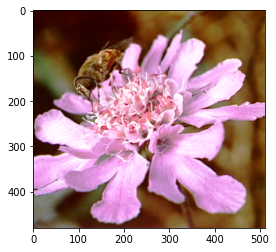

In [ ]:
#L'image resultante:
new_image_egalisee=cv.merge([new_r,new_g,new_b])

plt.imshow(new_image_egalisee.astype('uint8'))



In [ ]:
entropie_2 = skm.shannon_entropy(new_image_egalisee)
print('l\'entropie est : ', entropie)

l'entropie est :  7.061836511908669


# Comaparison:

Text(0.5, 1.0, "Image résultante de l'egalisation avec l'histogramme cumulee")

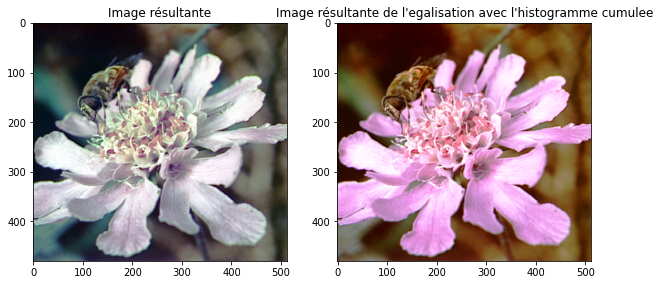

In [ ]:
# Comparaison:
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(new_image)
plt.title("Image résultante")
plt.subplot(1,2,2)
plt.imshow(new_image_egalisee.astype('uint8'))
plt.title("Image résultante de l'egalisation avec l'histogramme cumulee")


**Comparaison:**
On remarque que l'image obtenue en l'egalisant avec l'histogramme cumulé est mieux contraste que celle obtenue en égalisant les 3 composantes R G B 
on remarque aussi
l'entropie de la methode 1 > l'entropie de la methode 2 et cela est du au fait que l'histogramme egalisé resultant de l'égalistaion de l'image avec l'histogramme cumulé est mieux applati(car l'image resultante est meix contrastée ) et donc il aura une entrepie plus grande que le deuxieme cas car l’entropie
est maximale pour une répartition uniforme de probabilité.

# 10. Lire et visualiser l’image ‘pentagon.tif’:

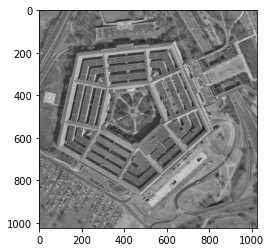

In [ ]:
pentagon = plt.imread('/content/pentagon.tif')
plt.imshow(pentagon,cmap='gray')

# Egaliser son histogramme:

(array([2.50000e+01, 2.54630e+04, 9.48380e+04, 1.83970e+05, 3.60090e+05,
        2.18298e+05, 1.10233e+05, 4.84340e+04, 6.67800e+03, 5.47000e+02]),
 array([ 46. ,  65.9,  85.8, 105.7, 125.6, 145.5, 165.4, 185.3, 205.2,
        225.1, 245. ]),
 <a list of 10 Patch objects>)

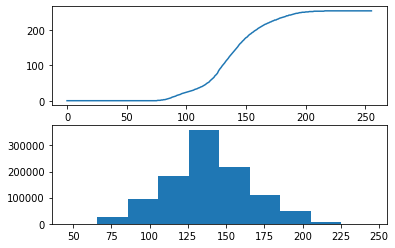

In [ ]:
pentagon_hist = pentagon.ravel()
hcn_pentagon = egaliser(pentagon_hist)
plt.subplot(2,1,1)
plt.plot(hcn_pentagon)
plt.subplot(2,1,2)
plt.hist(pentagon_hist)




# Commentaires:
L'image est gritastre, les niveaux de gris sont concentrées au milieux.

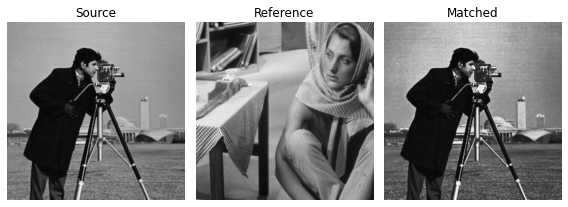

In [ ]:
from skimage import exposure
from skimage.exposure import match_histograms
reference = plt.imread('/content/barbara.png')
image = plt.imread('/content/cameraman.jpg')

matched = match_histograms(image, reference)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image,cmap='gray')
ax1.set_title('Source')
ax2.imshow(reference,cmap='gray')
ax2.set_title('Reference')
ax3.imshow(matched,cmap='gray')
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

# Commentaires:
En faisant un histogram matching sur l'image, on peut voir que le contraste de l'image est amelioré, on peut mieux distinguer les batiments deriere l'homme,le sol,le ciel..., les detailles de l'image sont accentués.


# **MANIP 2:**

In [ ]:
# 1 on cree deux images binaires A et B :
A=np.ones((256,256))
B=np.ones((256,256))

In [ ]:
A[90:121,90:181]=0
B[110:151,110:151]=0

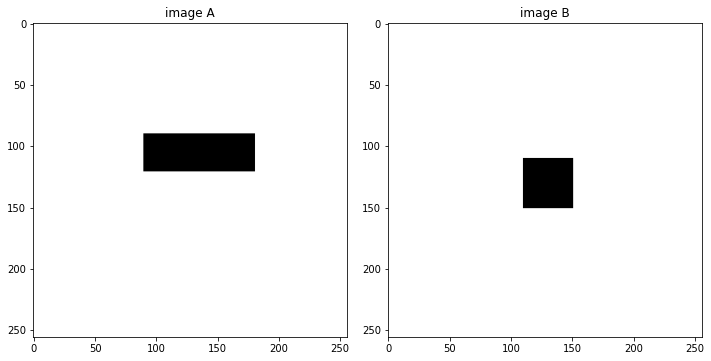

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(A,cmap='gray')
plt.title("image A")
plt.subplot(1,2,2)
plt.imshow(B,cmap='gray')
plt.title("image B")
plt.tight_layout()

# realistaion des operations logiques:

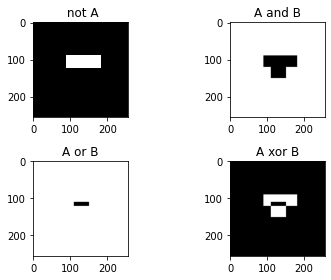

In [ ]:

fig,ax=plt.subplots(2,2)
ax[0,0].imshow(cv.bitwise_not(A),cmap='gray')
ax[0, 0].set_title(' not A')
ax[0,1].imshow(cv.bitwise_and(A,B),cmap='gray')
ax[0, 1].set_title('A and B')
ax[1,0].imshow(cv.bitwise_or(A,B),cmap='gray')
ax[1, 0].set_title('A or B')
ax[1,1].imshow(cv.bitwise_xor(A,B),cmap='gray')
ax[1, 1].set_title('A xor B')
plt.tight_layout()


# Analyse des résultats:


*   Les resultats obtenues sont cohérents avec les opérations logiques. par exemples pour l'operation A and B les deux fonds sont bloncs = true and true le resultat atendus est true =1 et c'est ce a été obtenue.


In [ ]:
Ai=cv.bitwise_not(A)
Bi=cv.bitwise_not(B)

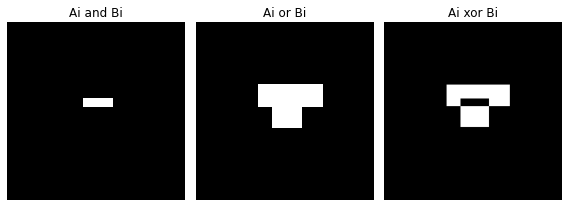

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax1.imshow(cv.bitwise_and(Ai,Bi),cmap='gray')
ax1.set_title('Ai and Bi')
ax2.imshow(cv.bitwise_or(Ai,Bi),cmap='gray')
ax2.set_title('Ai or Bi')
ax3.imshow(cv.bitwise_xor(Ai,Bi),cmap='gray')
ax3.set_title('Ai xor Bi')
plt.tight_layout()

# Comparaison:
Dans ce cas les resultats ne sont par cohérents, par exemples pour l'opération A and B le fond est noir pour les deux images => False and False, le resultat attendu est True=1 => un fond resultant blanc mais par contre en a obtenue un fond noir.
Conclusion: les images utilisées doivent avoir un fond blanc.

# **Manip 3:**

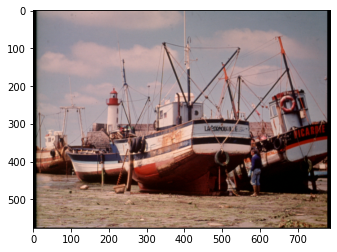

In [ ]:
boatcolors = plt.imread('/content/BoatsColor.bmp')
plt.imshow(boatcolors)

# **Conclusion:**
A travers ce Tp on a pu faire des traitements  sur des images, pour le but d'ameliorer le contraste, on a utilisé les deux méthodes d'égalisation d'histogramme sur une image en niveaux de gris et aussi sur une image couleur en utilisant deux methodes, ou on a conclus que l'égalistion par l'histogramme cumulée de l'image en niveaux de gris est mieux que l'égalisation des composantes R G B, on a aussi vu la méthode  histogram matching pour ameliorer le contaraste de l'image. 
dans ce tp, on a vu les operations logiques sur les images et on a conclus qu'il faut utiliser des images de fond blanc pour pouvoir effectuer des opérations logiques et avoir un résultat correctes.